In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

## Data Gathering

In [2]:
Data_archive=pd.read_csv('twitter-archive-enhanced-2.csv')
print(Data_archive)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                 

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
respo=requests.get(url)
with open('image-predictions-3.tsv', mode='wb') as file:
    file.write(respo.content)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)



NameError: name 'df_1' is not defined

In [ ]:
df_ls = []
with open('tweet-json.txt') as file:
    for line in file:
        df_ls.append(json.loads(line))

In [ ]:
print(df_ls[0])

## Data Assessing

In [ ]:
tweetdata=pd.DataFrame(df_ls, columns =['id','retweet_count','favorite_count'])

In [5]:
tweetdata.head()

NameError: name 'tweetdata' is not defined

In [6]:
tweetdata= tweetdata.rename(columns = {'id':'tweet_id'})

NameError: name 'tweetdata' is not defined

In [7]:
print(tweetdata)

NameError: name 'tweetdata' is not defined

In [ ]:
tweetdata.to_csv('data.csv')

In [8]:
tweetdatacsv = pd.read_csv('data.csv')


In [9]:
print(tweetdatacsv)

      Unnamed: 0            tweet_id  retweet_count  favorite_count
0              0  892420643555336193           8853           39467
1              1  892177421306343426           6514           33819
2              2  891815181378084864           4328           25461
3              3  891689557279858688           8964           42908
4              4  891327558926688256           9774           41048
5              5  891087950875897856           3261           20562
6              6  890971913173991426           2158           12041
7              7  890729181411237888          16716           56848
8              8  890609185150312448           4429           28226
9              9  890240255349198849           7711           32467
10            10  890006608113172480           7624           31166
11            11  889880896479866881           5156           28268
12            12  889665388333682689           8538           38818
13            13  889638837579907072           4

In [10]:
#this step to remove the unnamed column
tweetdata.to_csv('tweetdata.csv' ,index = False)

NameError: name 'tweetdata' is not defined

In [11]:
tweetdatacsv = pd.read_csv('tweetdata.csv')

In [12]:
print(tweetdatacsv)

                tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709         

In [13]:
print(Data_archive)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                 

In [14]:
Data_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## There are some quality and tidiness issues appeared from data frame info:
## Quality:
1-The data Type of timestamp is object.
2-The number of retweeted should be 0 while there are 181 retweeted_status_id .
3- tweet_id is integer
## tidiness:
1-The life stages of dogs separated into four columns


In [15]:
Data_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

# Quality:
the minimum denomintaor is 0 and the maximum 170 while it should be equal 10

In [16]:
Data_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

# Quality:
the minimum numerator is 0  while it should be not less that  10

In [17]:
Data_archive[Data_archive.rating_denominator==0].count()

tweet_id                      1
in_reply_to_status_id         1
in_reply_to_user_id           1
timestamp                     1
source                        1
text                          1
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              1
rating_denominator            1
name                          1
doggo                         1
floofer                       1
pupper                        1
puppo                         1
dtype: int64

In [18]:
#this step to count the tweet_id
Data_archive[Data_archive.rating_denominator==0].count()[0]

1

there is only one case =0 whose id 313

In [19]:
Data_archive[Data_archive.rating_denominator==0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [20]:
Data_archive.loc[313,'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [21]:
Data_archive[Data_archive.rating_denominator<10].count()[0]

3

In [22]:
Data_archive[Data_archive.rating_denominator<10].tweet_id

313     835246439529840640
516     810984652412424192
2335    666287406224695296
Name: tweet_id, dtype: int64

In [23]:
Data_archive.loc[516,'text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [24]:
Data_archive.loc[2335,'text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [25]:
Data_archive[Data_archive.rating_denominator>10].count()[0]

20

there are cases have less and greater than 10 in denomintaor = 23 cases like the following:

In [26]:
Data_archive[Data_archive.rating_denominator!=10].tweet_id

313     835246439529840640
342     832088576586297345
433     820690176645140481
516     810984652412424192
784     775096608509886464
902     758467244762497024
1068    740373189193256964
1120    731156023742988288
1165    722974582966214656
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1598    686035780142297088
1634    684225744407494656
1635    684222868335505415
1662    682962037429899265
1663    682808988178739200
1779    677716515794329600
1843    675853064436391936
2335    666287406224695296
Name: tweet_id, dtype: int64

In [27]:
Data_archive[Data_archive.rating_numerator<10].count()[0]

440

In [28]:
Data_archive[Data_archive.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

## (Data_archive)
## Quality:
1-The data Type of timestamp is object.
2-The number of retweeted should be 0 while there are 181 retweeted_status_id .
3- tweet_id is integer
4- 23 cases have the denominators not equal to 10.
5-one case 313 has the denominator value 0
6- 440 case have numerator value less than 10 look (out[35])
## tidiness:
1-The life stages of dogs separated into four columns


In [29]:
image_predictions=pd.read_csv('image-predictions-3.tsv',sep='\t')

In [30]:
print(image_predictions)

                tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/me

In [31]:
#check p1 (coho), this is afish and p1_dog is false and that's good
image_predictions.head(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [32]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
Data_archive.tweet_id.count()

2356

## (image_predictions)
## Quality 
1- there are missing value cases ( the number of cases in data_archive =2356 while in  image_predictions =2075.


In [34]:
print(tweetdatacsv)

                tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709         

In [35]:
tweetdatacsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## (tweetdatacsv)
## Quality 
1- there are missing value cases ( the number of cases in data_archive =2356 while in  tweetdatacsv =2354.

## Total
## Quality
1-The data Type of timestamp is object.
2-The number of retweeted should be 0 while there are 181 retweeted_status_id .
3- tweet_id is integer
4- 23 cases have the denominators not equal to 10.
5-one case 313 has the denominator value 0
6- 440 case have numerator value less than 10 look (out[35])
7-there are missing value cases ( the number of cases in data_archive =2356 while in  image_predictions =2075.
8-there are missing value cases ( the number of cases in data_archive =2356 while in  tweetdatacsv =2354.
## tidiness:
1-The life stages of dogs separated into four columns.
2- thereis aredudancy in dataframes we can merge all data set in one to easily manipulate. 

# Data Cleaning.
## Dataframes Coping.

In [36]:
clean_Data_archive = Data_archive.copy()
clean_image_predictions = image_predictions.copy()
clean_tweetdatacsv = tweetdatacsv.copy()

In [37]:
clean_Data_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [38]:
clean_image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
clean_tweetdatacsv.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Cleaning tidiness
tidiness #1


# Define
Merge the 4 life stages columns into one called life_stages

# Code

In [40]:
clean_Data_archive['life_stages']= clean_Data_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_Data_archive.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,life_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


In [41]:
clean_Data_archive= clean_Data_archive.drop(columns=['doggo','floofer','pupper','puppo'])

In [42]:
clean_Data_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,life_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


## Test

In [43]:
clean_Data_archive.life_stages.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: life_stages, dtype: int64

## T2
## Define
merge all datasets into one

## Code


In [44]:
#join the data frame clean_Data_archive into clean_tweetdatacsv
clean_Data_archive = pd.merge(clean_Data_archive,clean_tweetdatacsv,on='tweet_id',how='left')

In [45]:
#join the data frame clean_image_predictions into joined data frame
clean_Data_archive = pd.merge(clean_Data_archive,clean_image_predictions,on='tweet_id',how='left')

## test

In [46]:
clean_Data_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
life_stages                   399 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2

In [47]:
Data_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [48]:
tweetdatacsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [49]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The joined dataframe have 27 coulmns sum of :
14 columns data_archive " after droping the 4 columns and add one)
2 colums tweetdatacsv
11 colums image_predictions


# Cleaning Quality
quality #1 and #3

N.B
1-The data Type of timestamp is object.
2-The number of retweeted should be 0 while there are 181 retweeted_status_id .
3- tweet_id is integer
4- 23 cases have the denominators not equal to 10.
5-one case 313 has the denominator value 0
6- 440 case have numerator value less than 10 look (out[35])
7-there are missing value cases ( the number of cases in data_archive =2356 while in  image_predictions =2075.
8-there are missing value cases ( the number of cases in data_archive =2356 while in  tweetdatacsv =2354.

# Define


converting the data type of timestamp to datetime and tweet_id to string

# Code

In [50]:
clean_Data_archive.timestamp = pd.to_datetime(clean_Data_archive.timestamp)
clean_Data_archive['tweet_id'] = clean_Data_archive['tweet_id'].apply(str)


# Test

In [51]:
clean_Data_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
life_stages                   399 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num               

# Define Q#2
drop cases that contains retweet values and retweet related columns as well

# Code

In [52]:
clean_Data_archive = clean_Data_archive[clean_Data_archive.retweeted_status_id.isnull()]
clean_Data_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
life_stages                   364 non-null object
retweet_count                 2175 non-null float64
favorite_count                2175 non-null float64
jpg_url                       1994 non-null object
img_num                     

In [53]:
#drop (retweeted_status_id ,retweeted_status_user_id ,retweeted_status_timestamp  )
clean_Data_archive= clean_Data_archive.drop(columns=['retweeted_status_id' ,'retweeted_status_user_id' ,'retweeted_status_timestamp'])

# Test

In [54]:
clean_Data_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
life_stages              364 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

# Q #7 & #8 

# Define
Drop cases which contains the mentioned missing values


# Code

In [55]:

clean_Data_archive = clean_Data_archive[clean_Data_archive.jpg_url.notnull()]

# Test

In [56]:
clean_Data_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
life_stages              326 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf     

# Storing_Data

In [57]:
clean_Data_archive.to_csv('twitter_archive_master.csv')

# Data Visualization and analysis

# The distribution of the dogs life stage using Pie chart


In [97]:
distribution_df =clean_Data_archive.life_stages.value_counts()

In [98]:
print(distribution_df)

pupper     223
doggo       72
puppo       28
floofer      3
Name: life_stages, dtype: int64


Text(0.5,1,'Distribution of dogs life stages')

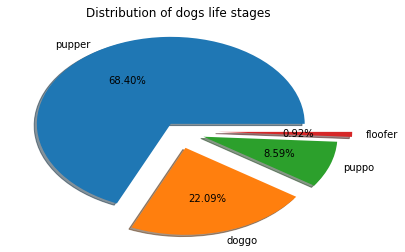

In [104]:
plt.pie(distribution_df,labels = ['pupper','doggo','puppo','floofer'],autopct='%1.2f%%',shadow=True,explode =(0.1,0.2,0.2,0.3))
plt.title ('Distribution of dogs life stages')


# insight
1- the pupper life stage is the highest %.
2-the floofer life stage is the lowest %.

# exploring the outliers in retweet and favorite count

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2c2480c9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2c24817438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2c2480c860>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c24817c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c247a3128>],
 'means': []}

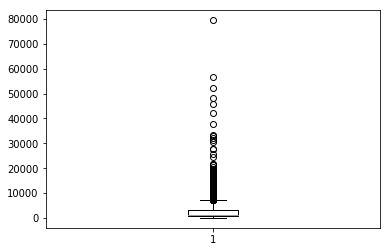

In [110]:
countretweet = clean_Data_archive.retweet_count

plt.boxplot(countretweet)



{'whiskers': [<matplotlib.lines.Line2D at 0x7f2c246c0d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2c246c9710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2c246c0ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c246c9fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c246d2470>],
 'means': []}

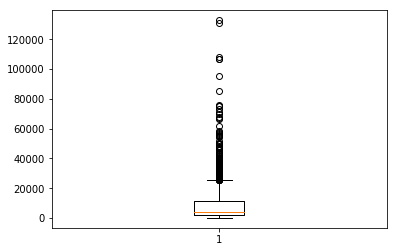

In [114]:
countfavourite= clean_Data_archive.favorite_count

plt.boxplot(countfavourite)




In [113]:
clean_Data_archive.favorite_count.describe()

count      1994.000000
mean       8895.725677
std       12213.193181
min          81.000000
25%        1982.000000
50%        4136.000000
75%       11308.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [115]:
clean_Data_archive.favorite_count.median()

4136.0

# Insight 
3-There are some dogs photos are "extremly" favorite than Normal where the median is 4136
4- perhabs there is arelationship between Favorite and retweet count i will confirm by scattor plot

# Scatter plot betn. Favorite and retweet count.

Text(0,0.5,'retweet_count')

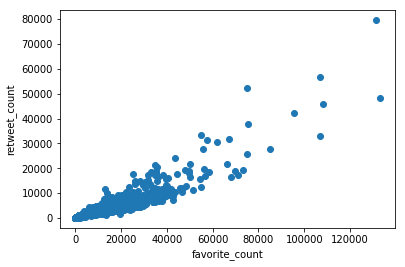

In [119]:
plt.scatter(clean_Data_archive.favorite_count, clean_Data_archive.retweet_count)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

# Insight 
5- There is positive medium relationship between retweet and favorit count.

# Review Requirments

# Quality
invalid dog names

In [58]:
sum(clean_Data_archive.name.isnull())

0

In [59]:
clean_Data_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1647,683828599284170753,NaN,NaN,2016-01-04 01:53:37,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking pupper here. Should be on the cov...,https://twitter.com/dog_rates/status/683828599...,12,10,None,...,1.0,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Calvin. He's proof that degrees mean abso...,https://twitter.com/dog_rates/status/695629776...,8,10,Calvin,...,1.0,Old_English_sheepdog,0.693857,True,otterhound,0.232117,True,West_Highland_white_terrier,0.012867,True
1503,692017291282812928,NaN,NaN,2016-01-26 16:12:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Kingsley Wellensworth III. He owns 7 r...,https://twitter.com/dog_rates/status/692017291...,9,10,Kingsley,...,1.0,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,...,1.0,whippet,0.378151,True,Italian_greyhound,0.275935,True,American_Staffordshire_terrier,0.094991,True
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,...,3.0,Border_collie,0.548907,True,Cardigan,0.178523,True,collie,0.146351,True
1111,733482008106668032,NaN,NaN,2016-05-20 02:18:32,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",https://twitter.com/dog_rates/status/733482008...,10,10,None,...,1.0,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
630,794332329137291264,NaN,NaN,2016-11-04 00:15:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,...,1.0,Samoyed,0.988307,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True
1631,684481074559381504,NaN,NaN,2016-01-05 21:06:19,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,https://twitter.com/dog_rates/status/684481074...,10,10,Pippa,...,1.0,Chihuahua,0.937810,True,Pomeranian,0.020307,True,polecat,0.017357,False
877,760893934457552897,NaN,NaN,2016-08-03 17:43:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Wishes. He has the day off. Daily stru...,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,...,1.0,Blenheim_spaniel,0.113992,True,cocker_spaniel,0.105780,True,borzoi,0.073935,True
1112,733460102733135873,NaN,NaN,2016-05-20 00:51:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Hermione. Her face is as old as time. ...,https://twitter.com/dog_rates/status/733460102...,11,10,Hermione,...,1.0,chow,0.931275,True,beaver,0.028831,False,dhole,0.017379,False


# Define
Convert invalid dog names to NaN

# Code

In [60]:
clean_Data_archive.name = clean_Data_archive.name.replace(regex=['^[a-z]+', 'None'], value =np.nan)

# Test

In [61]:
clean_Data_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1585,686947101016735744,NaN,NaN,2016-01-12 16:25:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. He was specifically told not ...,https://twitter.com/dog_rates/status/686947101...,11,10,Jackson,...,1.0,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
2105,670474236058800128,NaN,NaN,2015-11-28 05:28:09,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Great teeth. Nice horn...,https://twitter.com/dog_rates/status/670474236...,10,10,NaN,...,1.0,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
1036,744971049620602880,NaN,NaN,2016-06-20 19:11:53,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Indie and Jupiter. They're having...,https://twitter.com/dog_rates/status/744971049...,12,10,Indie,...,1.0,toy_poodle,0.497755,True,golden_retriever,0.282017,True,miniature_poodle,0.090032,True
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Iggy. He was a rescue dog killed in th...,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,...,2.0,web_site,0.919649,False,menu,0.026306,False,crossword_puzzle,0.003482,False
1850,675740360753160193,NaN,NaN,2015-12-12 18:13:51,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,https://twitter.com/dog_rates/status/675740360...,12,10,NaN,...,1.0,golden_retriever,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True
1477,693622659251335168,NaN,NaN,2016-01-31 02:31:43,"<a href=""http://twitter.com/download/iphone"" r...",When you keepin the popcorn bucket in your lap...,https://twitter.com/dog_rates/status/693622659...,10,10,NaN,...,1.0,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True
2282,667211855547486208,NaN,NaN,2015-11-19 05:24:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Genevieve. She is a golden retriever c...,https://twitter.com/dog_rates/status/667211855...,9,10,Genevieve,...,1.0,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
328,833722901757046785,NaN,NaN,2017-02-20 17:00:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,...,1.0,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,...,1.0,miniature_schnauzer,0.294457,True,Norfolk_terrier,0.161885,True,West_Highland_white_terrier,0.120992,True
2172,669327207240699904,NaN,NaN,2015-11-25 01:30:16,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,https://twitter.com/dog_rates/status/669327207...,13,10,NaN,...,1.0,golden_retriever,0.919584,True,Labrador_retriever,0.049669,True,kuvasz,0.010216,True


In [62]:
sum(clean_Data_archive.name.isnull())

644

# Quality 2

Some Column headers are non descriptive

# Define
convert column headers non-descriptive to descriptive

# Code

In [63]:
clean_Data_archive.head(0)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [64]:
clean_Data_archive.rename(columns = {'p1':'breed1', 'p2':'breed2','p3':'breed3', 'p1_conf':'breed1_confidence','p2_conf':'breed2_confidence','p3_conf':'breed3_confidence','p1_dog':'Is_breed1_dog?','p2_dog':'Is_breed2_dog?','p3_dog':'Is_breed3_dog?','img_num':'image_number'}, inplace = True)

# Test

In [65]:
clean_Data_archive.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,image_number,breed1,breed1_confidence,Is_breed1_dog?,breed2,breed2_confidence,Is_breed2_dog?,breed3,breed3_confidence,Is_breed3_dog?


In [65]:
clean_Data_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,image_number,breed1,breed1_confidence,Is_breed1_dog?,breed2,breed2_confidence,Is_breed2_dog?,breed3,breed3_confidence,Is_breed3_dog?
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


# Quality 3

Some cases in columns (Breed1 ,breed2 and breed3) contains underscore instead of space fro example "paper_towel".

# Define
convert underscore to space.

# Code

In [66]:
clean_Data_archive.breed1 = clean_Data_archive.breed1.str.replace('_',' ')